In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesDate_n', normalize=True, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.796 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.475 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.079 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.056 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.630 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=6.005 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.220 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

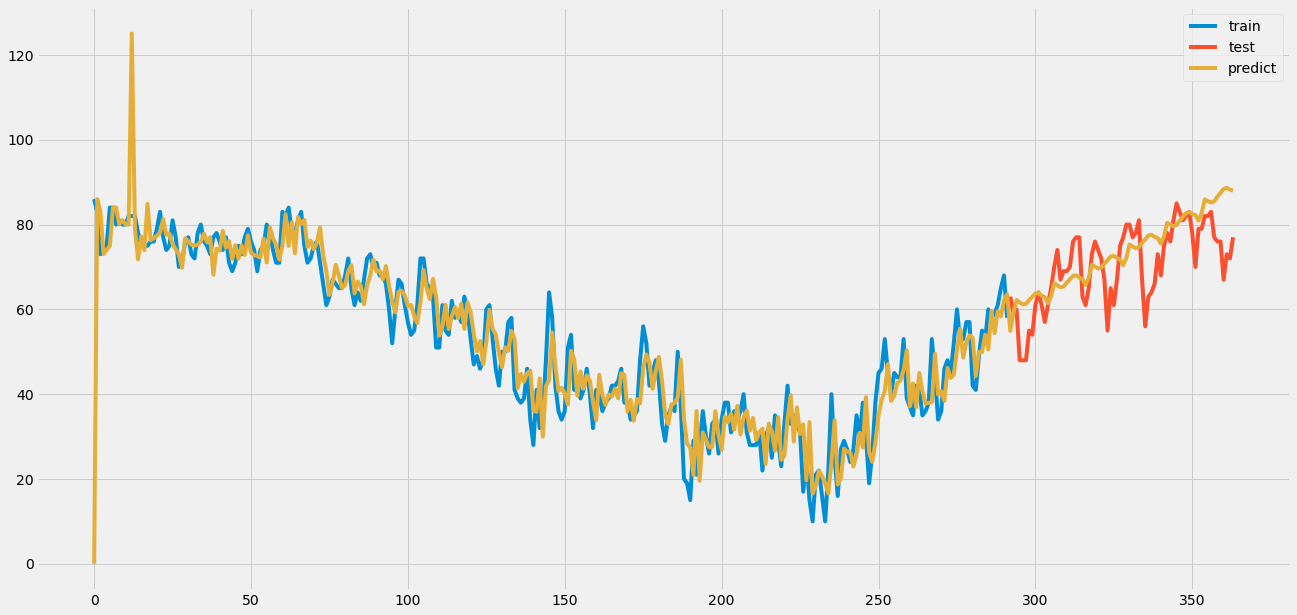

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 3.71095890411  Num NaN: 0'

'Test Error: 19.7611111111    Num NaN: 0'

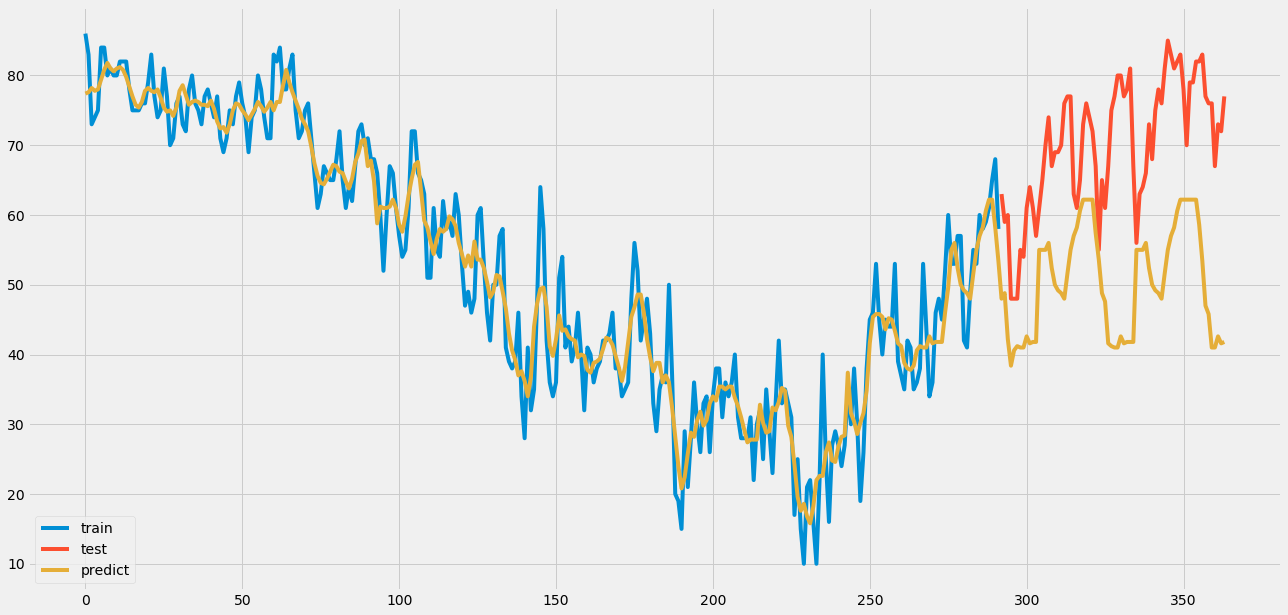

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 15.2158600442  Num NaN: 0'

'Test Error: 21.5552056318    Num NaN: 0'

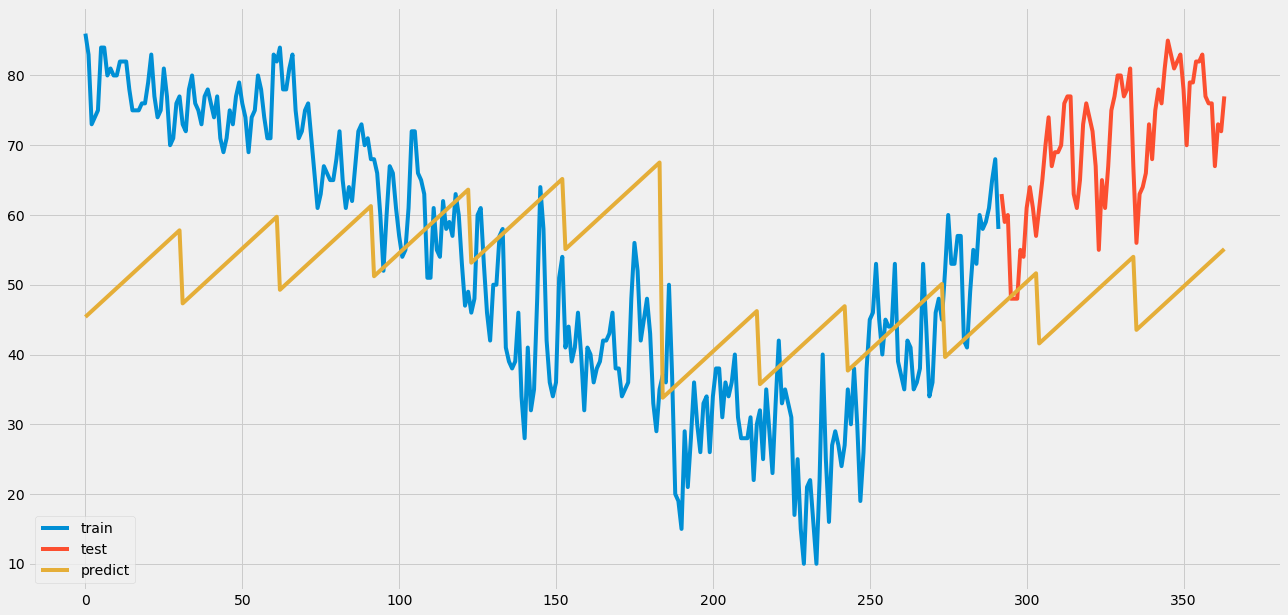

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 1.59760273973  Num NaN: 0'

'Test Error: 10.7847222222    Num NaN: 0'

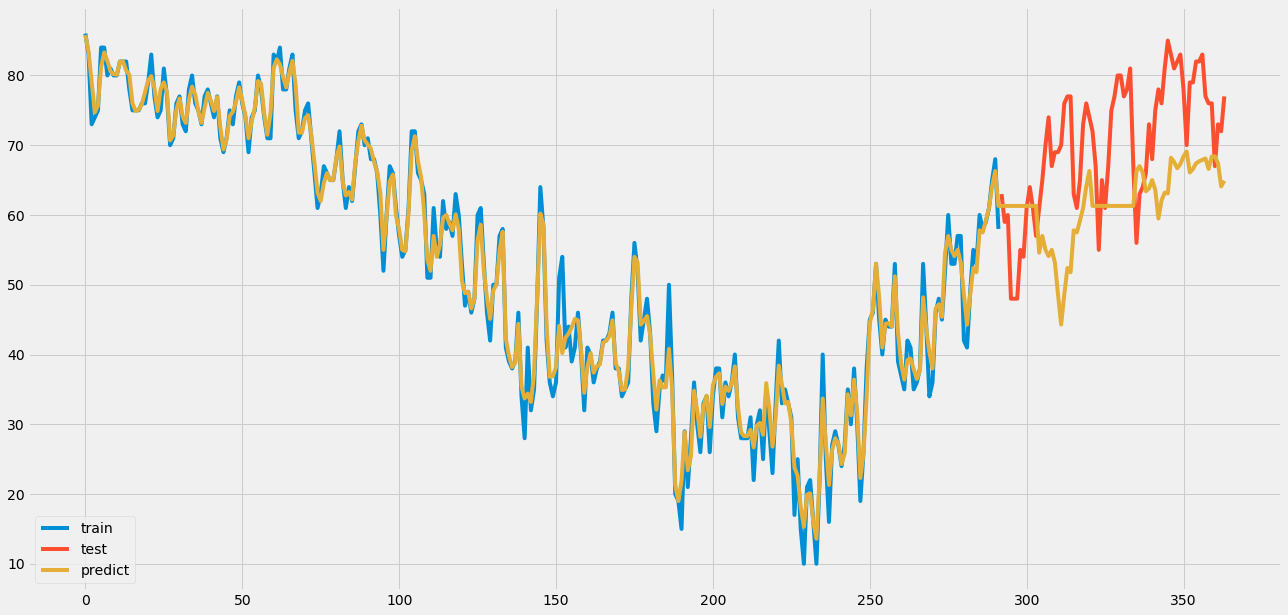

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 5.56000957554  Num NaN: 0'

'Test Error: 11.6326552288    Num NaN: 0'

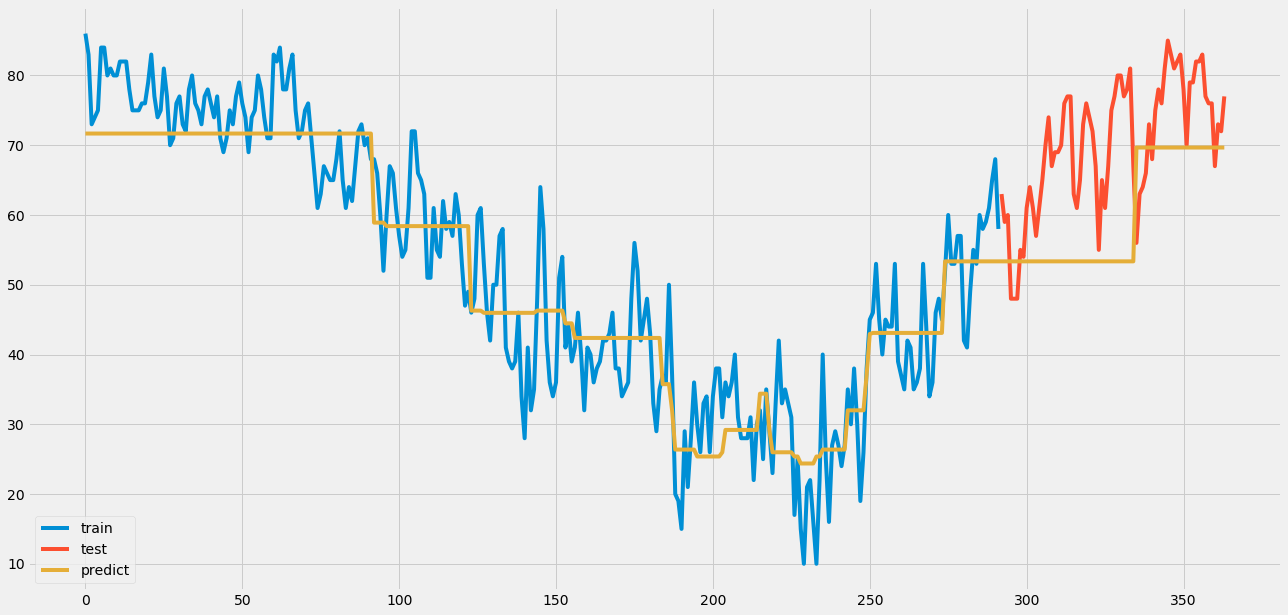

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.26935296516  Num NaN: 0'

'Test Error: 73.3845272064    Num NaN: 0'

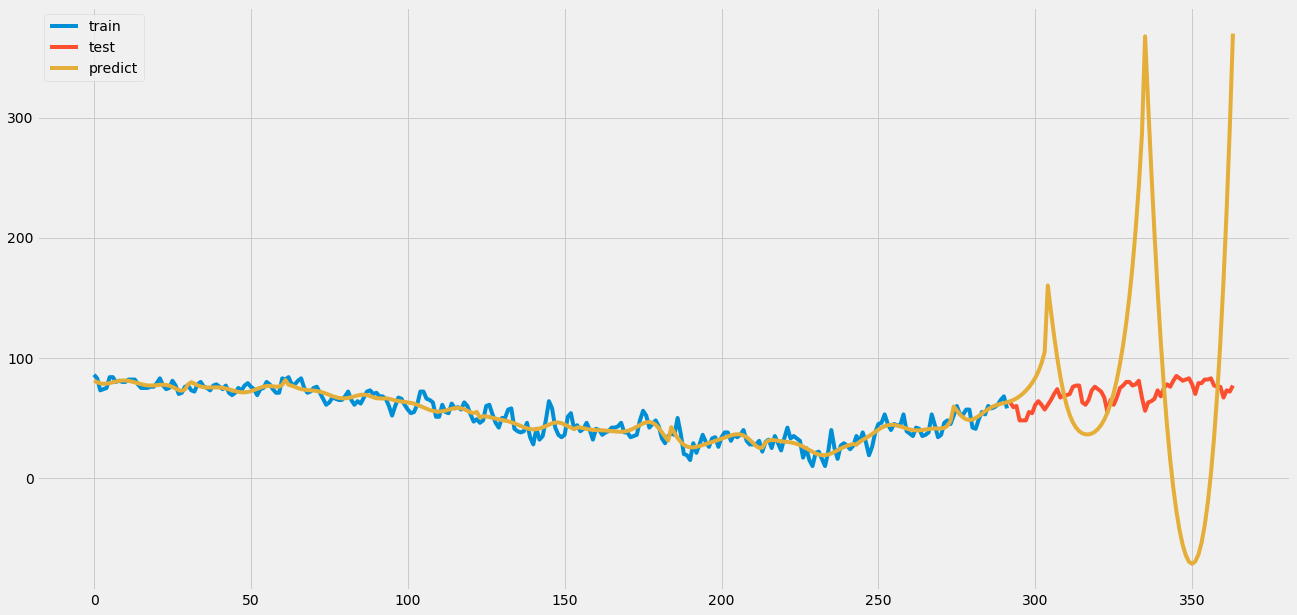

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 9.28226042795  Num NaN: 5'

'Test Error: 50.7158892473    Num NaN: 5'

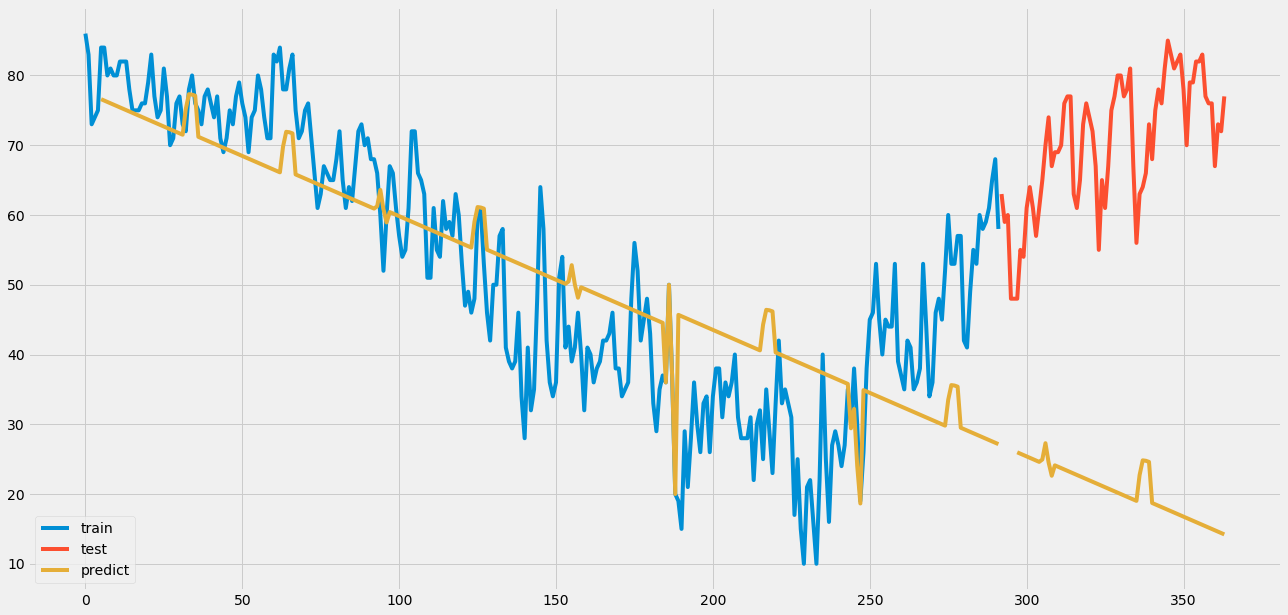

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2507 - val_loss: 0.3072
Epoch 2/10
 - 0s - loss: 0.1728 - val_loss: 0.2898
Epoch 3/10
 - 0s - loss: 0.1675 - val_loss: 0.3324
Epoch 4/10
 - 0s - loss: 0.1647 - val_loss: 0.3008
Epoch 5/10
 - 0s - loss: 0.1624 - val_loss: 0.2907
Epoch 6/10
 - 0s - loss: 0.1594 - val_loss: 0.3209
Epoch 7/10
 - 0s - loss: 0.1579 - val_loss: 0.3107
Epoch 8/10
 - 0s - loss: 0.1573 - val_loss: 0.3463
Epoch 9/10
 - 0s - loss: 0.1550 - val_loss: 0.3406
Epoch 10/10
 - 0s - loss: 0.1532 - val_loss: 0.2769


'Train Error: 11.5405673582  Num NaN: 5'

'Test Error: 20.7656260248    Num NaN: 5'

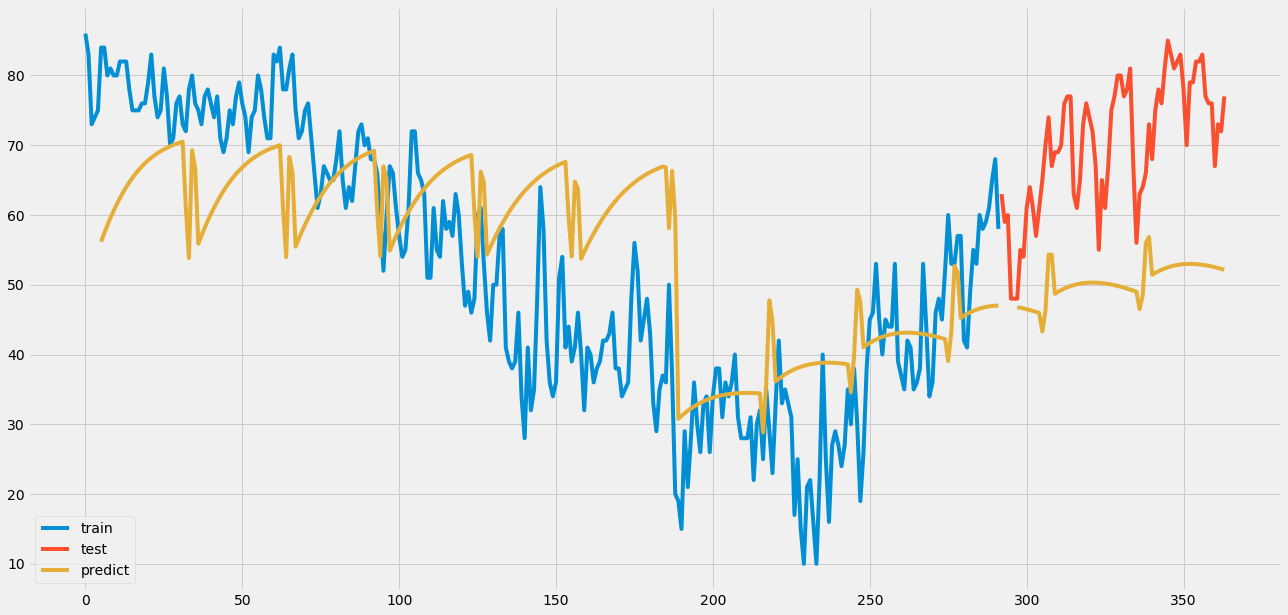

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2964 - val_loss: 0.0961
Epoch 2/10
 - 0s - loss: 0.2305 - val_loss: 0.3637
Epoch 3/10
 - 0s - loss: 0.2407 - val_loss: 0.1413
Epoch 4/10
 - 0s - loss: 0.2431 - val_loss: 0.5376
Epoch 5/10
 - 0s - loss: 0.2376 - val_loss: 0.3166
Epoch 6/10
 - 0s - loss: 0.2323 - val_loss: 0.4540
Epoch 7/10
 - 0s - loss: 0.2473 - val_loss: 0.3685
Epoch 8/10
 - 0s - loss: 0.2440 - val_loss: 0.1180
Epoch 9/10
 - 0s - loss: 0.2453 - val_loss: 0.1037
Epoch 10/10
 - 0s - loss: 0.2450 - val_loss: 0.0961


'Train Error: 24.164364858  Num NaN: 5'

'Test Error: 7.21045627879    Num NaN: 5'

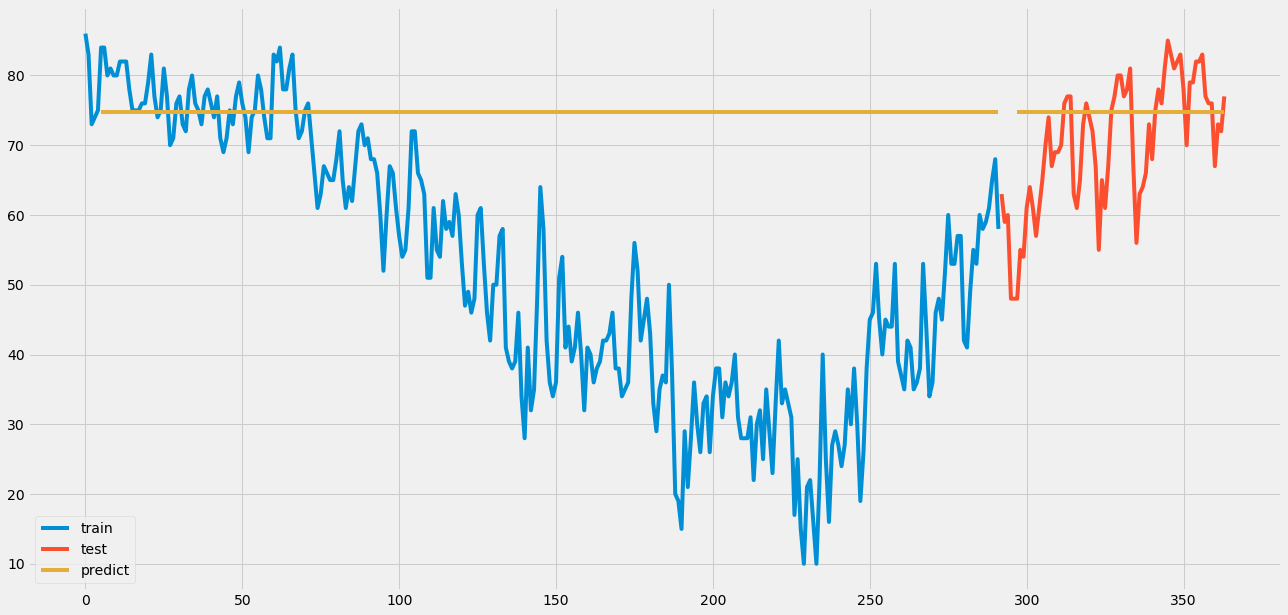

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.8107 - val_loss: 0.5449
Epoch 2/10
 - 0s - loss: 0.5667 - val_loss: 0.3737
Epoch 3/10
 - 0s - loss: 0.4189 - val_loss: 0.2676
Epoch 4/10
 - 0s - loss: 0.3172 - val_loss: 0.2018
Epoch 5/10
 - 0s - loss: 0.2485 - val_loss: 0.1589
Epoch 6/10
 - 0s - loss: 0.2008 - val_loss: 0.1289
Epoch 7/10
 - 0s - loss: 0.1663 - val_loss: 0.1058
Epoch 8/10
 - 0s - loss: 0.1386 - val_loss: 0.0870
Epoch 9/10
 - 0s - loss: 0.1162 - val_loss: 0.0716
Epoch 10/10
 - 0s - loss: 0.0974 - val_loss: 0.0587


'Train Error: 885.156522051  Num NaN: 0'

'Test Error: 591.704910702    Num NaN: 0'

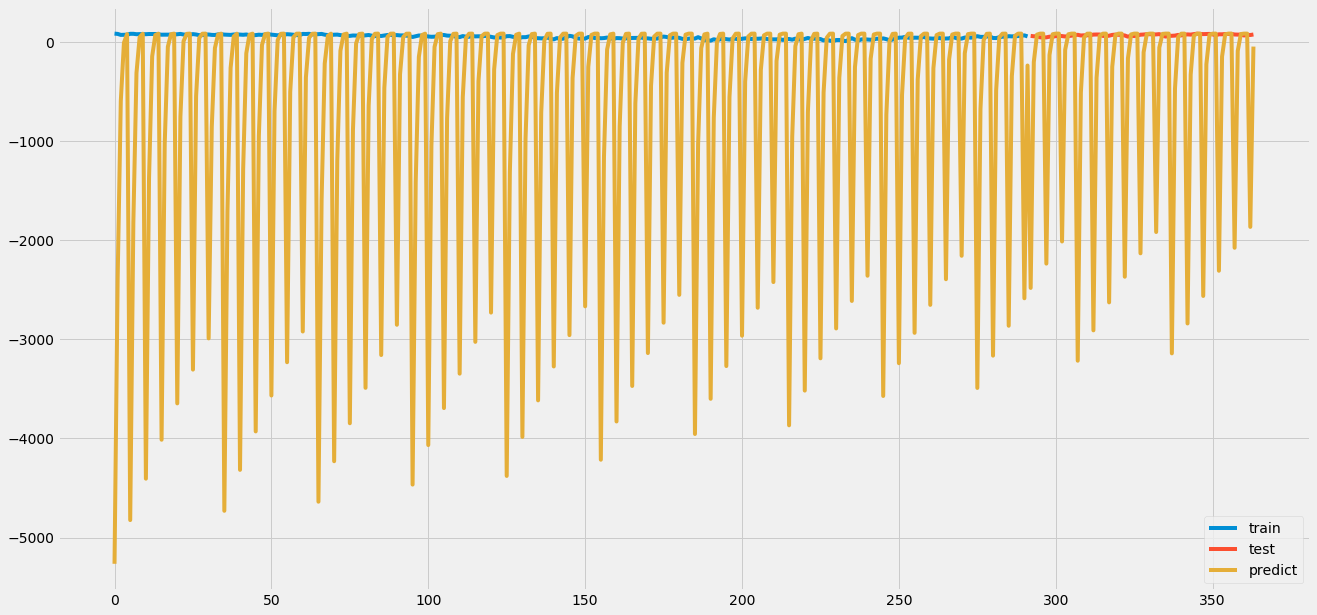

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.0652 - val_loss: 0.9857
Epoch 2/10
 - 1s - loss: 0.9932 - val_loss: 0.9418
Epoch 3/10
 - 1s - loss: 0.9504 - val_loss: 0.8877
Epoch 4/10
 - 1s - loss: 0.9057 - val_loss: 0.8383
Epoch 5/10
 - 1s - loss: 0.8627 - val_loss: 0.7868
Epoch 6/10
 - 1s - loss: 0.8162 - val_loss: 0.7308
Epoch 7/10
 - 1s - loss: 0.7572 - val_loss: 0.6609
Epoch 8/10
 - 1s - loss: 0.6755 - val_loss: 0.5384
Epoch 9/10
 - 1s - loss: 0.5591 - val_loss: 0.3843
Epoch 10/10
 - 1s - loss: 0.3962 - val_loss: 0.2629


'Train Error: 2463.63224019  Num NaN: 0'

'Test Error: 2651.74715    Num NaN: 0'

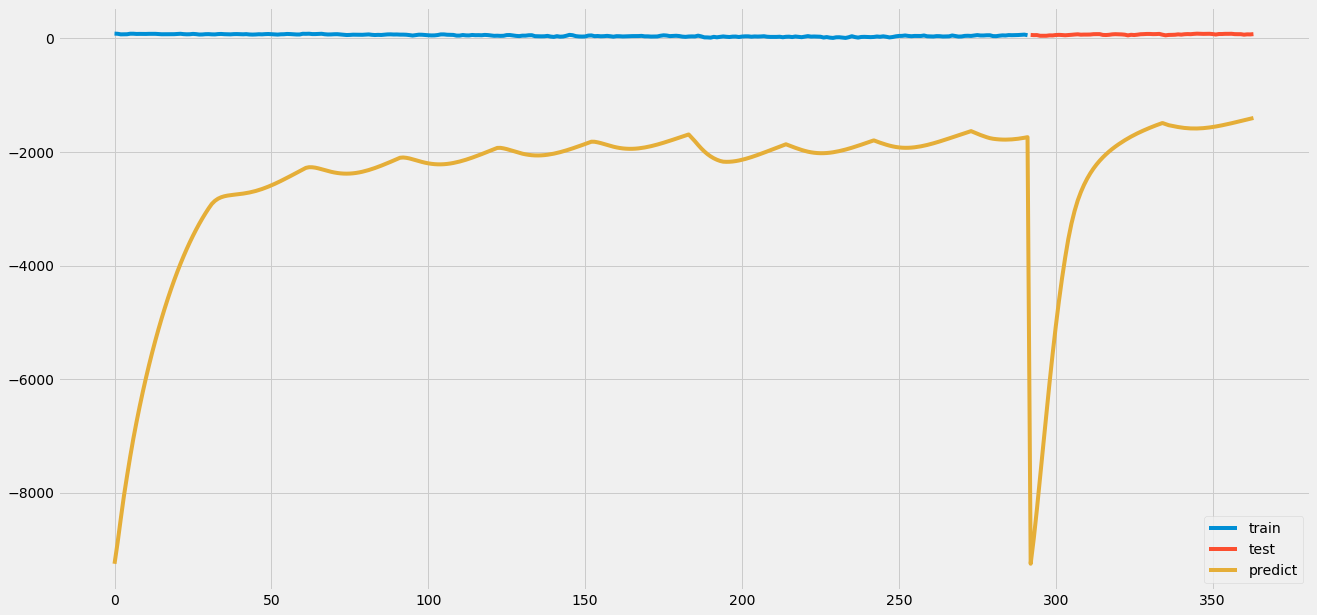

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')